In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
import datetime
import pylab
import math
import calendar
import functions.misc_functions as misc
from sklearn.preprocessing import OneHotEncoder

In [2]:
df1 = pd.read_csv('data/buckingham.csv', usecols=[1,5])

df1['TIME'] = pd.to_datetime(df1['TIME'])


# start = pd.to_datetime('2020-01-27')   # 2020-01-01 06:25:02. Data only reliable after 2020-01-26.
# end = pd.to_datetime(str(max(df1.TIME)))     # 2020-04-01 23:55:02. 
# start_date = start.date()
# end_date = end.date()

# t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
# t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


t_full=pd.array(pd.DatetimeIndex(df1.iloc[:,0]).astype(np.int64))/1000000000
df1['T']=(t_full-t_full[0])/60/60/24 # convert timestamp to days
df1['t'] = df1['T'].apply(lambda x: x%1)

# df
df1.drop(df1.loc[df1['T']<27].index, inplace=True)
df1.drop(df1.loc[df1['T']>90].index, inplace=True)

df1['WEEKDAY'] = pd.to_datetime(df1['TIME'])
df1.WEEKDAY = df1.WEEKDAY.dt.strftime('%A')

# df1['WEEKDAY'] = df1['WEEKDAY'].dt.dayofweek
# t = np.extract([(t_full>=t_start) & (t_full<=t_end)], t_full)
dt = t_full[1] - t_full[0]
# print(f"sampling interval = {dt} seconds")

In [16]:
df1

,TIME,AVAILABLE BIKES,T,t,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
1879,2020-01-28 06:25:02,23,27.000000,0.000000,0,0,0,0,0,1,0
1880,2020-01-28 06:30:27,23,27.003762,0.003762,0,0,0,0,0,1,0
1881,2020-01-28 06:35:02,23,27.006944,0.006944,0,0,0,0,0,1,0
1882,2020-01-28 06:40:02,23,27.010417,0.010417,0,0,0,0,0,1,0
1883,2020-01-28 06:45:02,23,27.013889,0.013889,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
19865,2020-03-31 06:00:02,14,89.982639,0.982639,0,0,0,0,0,1,0
19866,2020-03-31 06:05:02,14,89.986111,0.986111,0,0,0,0,0,1,0
19867,2020-03-31 06:10:02,14,89.989583,0.989583,0,0,0,0,0,1,0
19868,2020-03-31 06:15:02,14,89.993056,0.993056,0,0,0,0,0,1,0


In [4]:
# df1['t'] = df1['T'].apply(lambda x: x%1)
# df1

In [5]:
df2 = pd.read_csv('data/kilmainham.csv', usecols=[1,5])


start = pd.to_datetime(str(min(df2.TIME)))   # 2020-01-01 06:25:02. Data only reliable after 2020-01-26.
end = pd.to_datetime(str(max(df2.TIME)))     # 2020-04-01 23:55:02. 
start_date = start.date()
end_date = end.date()

t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


t_full2=pd.array(pd.DatetimeIndex(df2.iloc[:,0]).astype(np.int64))/1000000000
df2['T']=(t_full2-t_full2[0])/60/60/24 # convert timestamp to days
df2['t'] = df2['T'].apply(lambda x: x % 1) # column that has a number that essentially equates to time.
# It is skewed, 0 = 6am ish

df2.drop(df2.loc[df2['T']<27].index, inplace=True)
df2.drop(df2.loc[df2['T']>90].index, inplace=True)

df2['WEEKDAY'] = pd.to_datetime(df2['TIME'])
df2.WEEKDAY = df2.WEEKDAY.dt.strftime('%A') # get categories for onehot encoding
# df2['WEEKDAY'] = df2['WEEKDAY'].dt.dayofweek
# t = np.extract([(t_full>=t_start) & (t_full<=t_end)], t_full)
dt = t_full[1] - t_full[0]
# print(f"sampling interval = {dt} seconds")
# df2['WEEKDAY'] = df2['WEEKDAY'].dt.dayofweek
# x = misc.oneHot()


In [6]:
# days_of_week = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
# days_df = pd.DataFrame(days_of_week, columns=['Bridge_Types'])
# # creating instance of one-hot-encoder
# enc = OneHotEncoder(handle_unknown='ignore')# passing bridge-types-cat column (label encoded values of bridge_types)
# enc_df = pd.DataFrame(enc.fit_transform(days_df[['Bridge_Types_Cat']]).toarray())# merge with main df bridge_df on key values
# days_df = days_df.join(enc_df)
# days_df

### One-hot encode weekdays to stop some days from being preferred for no reason

In [7]:
# df2.append( pd.get_dummies(df2.WEEKDAY))
x = pd.get_dummies(df1.WEEKDAY)
df1 = pd.concat([df1, x], axis = 1)
df1 = df1.drop(columns="WEEKDAY")
x = pd.get_dummies(df2.WEEKDAY)
df2 = pd.concat([df2, x], axis = 1)
df2 = df2.drop(columns="WEEKDAY")


need to decide training data size/dates

In [8]:
df1

,TIME,AVAILABLE BIKES,T,t,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
1879,2020-01-28 06:25:02,23,27.000000,0.000000,0,0,0,0,0,1,0
1880,2020-01-28 06:30:27,23,27.003762,0.003762,0,0,0,0,0,1,0
1881,2020-01-28 06:35:02,23,27.006944,0.006944,0,0,0,0,0,1,0
1882,2020-01-28 06:40:02,23,27.010417,0.010417,0,0,0,0,0,1,0
1883,2020-01-28 06:45:02,23,27.013889,0.013889,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
19865,2020-03-31 06:00:02,14,89.982639,0.982639,0,0,0,0,0,1,0
19866,2020-03-31 06:05:02,14,89.986111,0.986111,0,0,0,0,0,1,0
19867,2020-03-31 06:10:02,14,89.989583,0.989583,0,0,0,0,0,1,0
19868,2020-03-31 06:15:02,14,89.993056,0.993056,0,0,0,0,0,1,0


Text(0, 0.5, 'Number of Available Bikes')

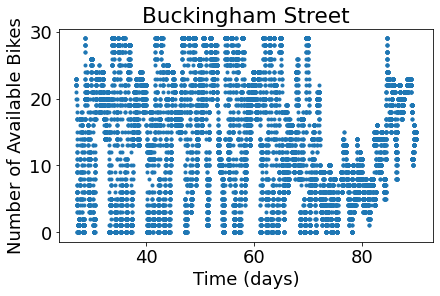

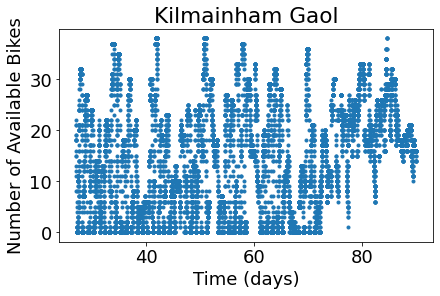

In [9]:
plt.figure('Buckingham')
plt.scatter(df1['T'], df1['AVAILABLE BIKES'],marker='.')
plt.title("Buckingham Street")
plt.xlabel("Time (days)")
plt.ylabel("Number of Available Bikes")
# pylab.xlim(27, 90)

plt.figure('Kilmainham')
plt.scatter(df2['T'], df2['AVAILABLE BIKES'],marker='.')
plt.title("Kilmainham Gaol")
plt.xlabel("Time (days)")
plt.ylabel("Number of Available Bikes")
# pylab.xlim(0, 90)

In [15]:
day = 3 # simple way to find out how many datapoints are in one of the days.
np.shape(df1.loc[(df1['T']<=day) & (df1['T']> day - 1)])


(0, 11)

### 10 min ahead features

In [11]:
T10 = misc.make_features(periods = 2, dataframe=df1,col='T',name='T10')
B10 = misc.make_features(periods = 2, dataframe=df1,col='AVAILABLE BIKES',name='B10')
B10
# five_before.reset_index(inplace = True)
# five_before.drop(columns=['index'])

,B10
0,0
1,0
2,23
3,23
4,23
...,...
17986,14
17987,14
17988,14
17989,14


### 30 min ahead features

### 60 min ahead features